## Mental Health in Tech Survey

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import functions directly from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
location = "Mental_Health.csv"
df = pd.read_csv(location)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.shape

(1259, 27)

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
df.drop(['comments','Timestamp','state'], axis=1, inplace=True)

In [8]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

#### Replace Missing Values

In [10]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
# fill missing values with "NO" 
df['self_employed'].fillna('No', inplace=True)

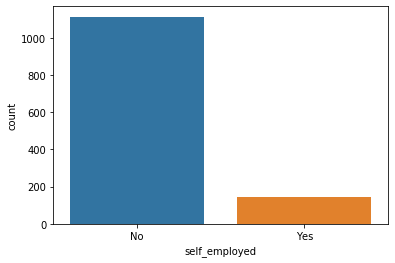

In [12]:
# More of the respondents are not self employed
sns.countplot(df['self_employed'])

In [13]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [14]:
# There are 264 missing values in this work_interefer column
#the missing values indicate that the respondent skipped the question because it does not apply to them,which is important information. 
#We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.
# fill missing values with "Never" 
df['work_interfere'].fillna('Never', inplace=True)

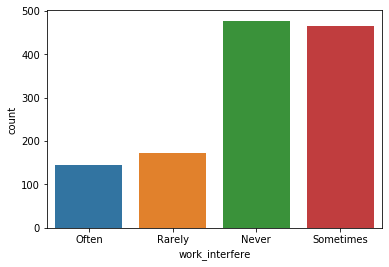

In [15]:
sns.countplot(df['work_interfere'])

#### Cleaning gender column

In [16]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [17]:
 df['Gender'] = df['Gender'].replace({'male':'Male', 'm':'Male', 'Male-ish':'Male', 'maile':'Male', 
                                                'something kinda male?':'Male', 'Cis Male':'Male', 'Mal':'Male', 
                                               'Mal':'Male', 'Male (CIS)':'Male', 'Make':'Male', 
                                                'male leaning androgynous':'Male', 'Man':'Male', 'msle':'Male', 'Mail':'Male', 
                                                'cis male':'Male', 'Malr':'Male', 'Cis Man':'Male', 
                                                'ostensibly male, unsure what that really means':'Male', 'M':'Male',
                                                    'Female':'Female', 'female':'Female', 'Cis Female':'Female',
                                               'F':'Female', 'Woman':'Female', 'f':'Female', 'Femake':'Female', 
                                                'woman':'Female', 'Female ':'Female', 'cis-female/femme':'Female', 'Female (cis)':'Female', 'femail':'Female', 'Male ':'Male', 
                                                'Trans-female': 'Female(Trans)', 'Trans woman': 'Female(Trans)', 
                                                'Female (trans)': 'Female(Trans)', 'queer/she/they':'Others', 
                                                'non-binary':'Others', 'Nah':'Others', 'All':'Others', 'Enby':'Others', 
                                                'fluid':'Others', 'Genderqueer':'Others', 'Androgyne':'Others', 
                                                'Agender':'Others', 'Guy (-ish) ^_^':'Others', 'Neuter':'Others', 
                                                'queer':'Others', 'A little about you':'Others', 'p':'Others'})

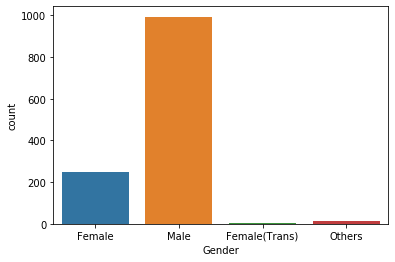

In [18]:
#a huge gap between the male and female workforce in tech companies
sns.countplot(df['Gender'])

In [19]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [20]:
df['Age'].min()

-1726

In [21]:
df['Age'].max()

99999999999

### Removing Outliers for Age

In [307]:
# calculate mean and standard deviation for 'age' column
mean_age = df['Age'].mean()
std_age =  df['Age'].std()

In [308]:
# boundary value at +1std (1 standard deviations above the mean) and -1std (1 standard deviations below the mean)

upper_std = mean_age + (1 * std_age)
lower_std = mean_age - (1 * std_age)

In [309]:
# select the rows between -1std and +1std (will filter out rows outside of those bounds)
df_std = df.loc[(df['Age'] >= lower_std) & (df['Age'] <= upper_std)]

In [310]:
# compare the number of rows in the dataframe before and after removing outliers
print(len(df))
print(len(df_std))

1259
1258


In [26]:
#function to assign age groups
def age_groups(Age):
    if Age <= 25:
        group = '18-25'
    elif Age <= 40:
        group = '26-40'
    elif Age < 60:
        group = '41-59'
    elif Age >= 60:
        group = '60+'
        
    return group

In [27]:
df['age_groups'] = df['Age'].apply(age_groups)

In [28]:
df_std['Age'].unique()

array([   37,    44,    32,    31,    33,    35,    39,    42,    23,
          29,    36,    27,    46,    41,    34,    30,    40,    38,
          50,    24,    18,    28,    26,    22,    19,    25,    45,
          21,   -29,    43,    56,    60,    54,   329,    55,    48,
          20,    57,    58,    47,    62,    51,    65,    49, -1726,
           5,    53,    61,     8,    11,    -1,    72], dtype=int64)

In [29]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_groups
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,26-40
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,41-59
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,26-40
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,26-40
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,26-40


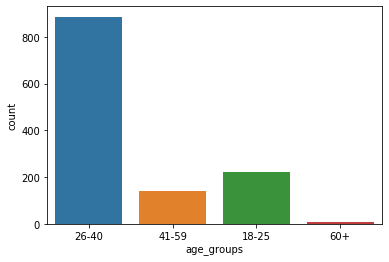

In [30]:
#most of the respondents are under age group 20-40
sns.countplot(df['age_groups'])

In [31]:
df['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

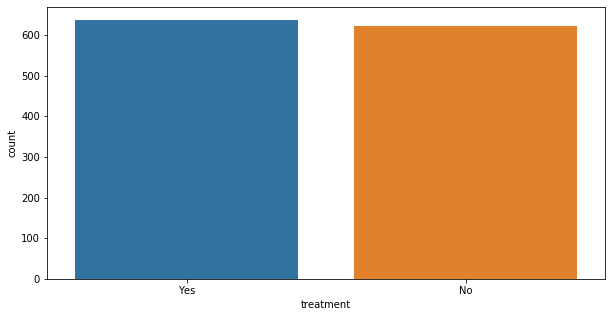

In [34]:
#people who are taking treatment for mental health isues shows that their work gets affected more as 
#compared to the people who are not taking any treatment for their mental health issues
plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', data=df)

Text(0.5, 1.0, 'Number of Employee')

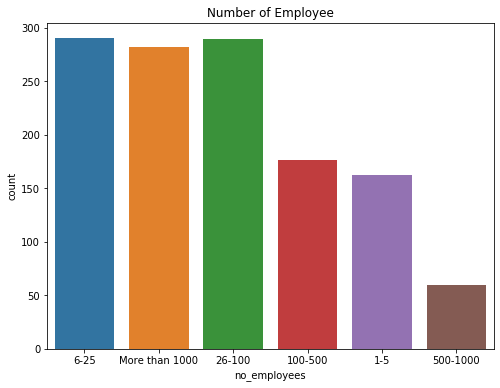

In [35]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees' )

plt.title('Number of Employee')

In [36]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 1.0, 'no_employee vs remote_work')

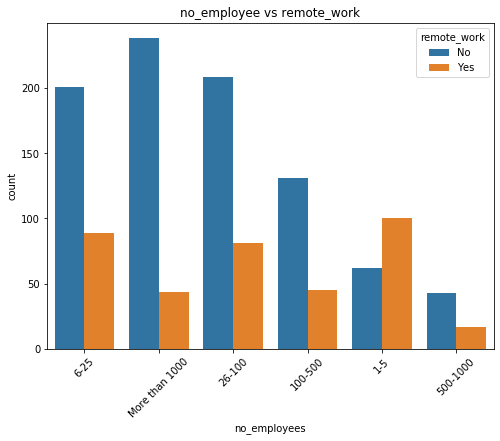

In [37]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees', hue ='remote_work',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs remote_work')

In [39]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

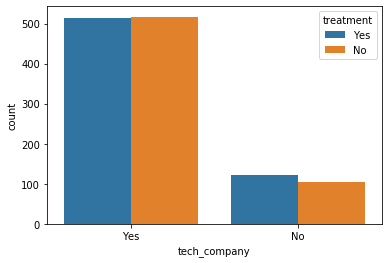

In [41]:
sns.countplot(x= 'tech_company', hue ='treatment', data= df)

In [120]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

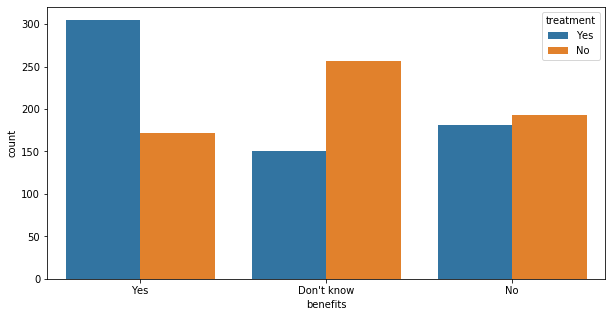

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(x="benefits", hue="treatment",  data=df)
 

In [122]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

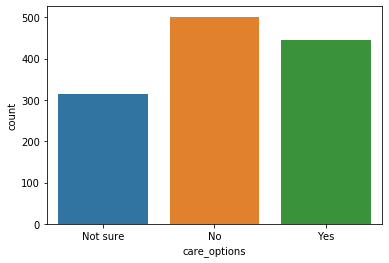

In [123]:
sns.countplot(x= 'care_options', data= df)

In [124]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

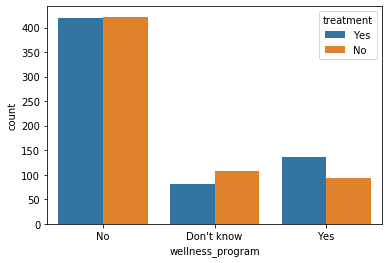

In [160]:
sns.countplot(x= 'wellness_program', hue= 'treatment', data= df)

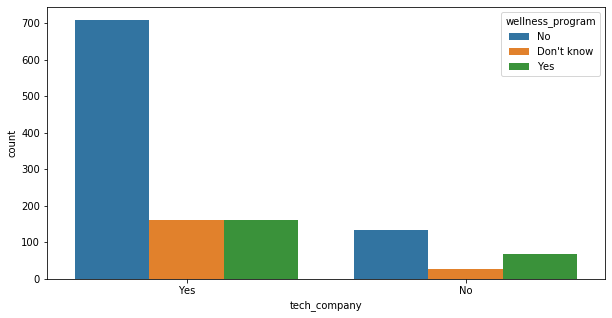

In [126]:
#discussion of mental health in employee wellness program by their employers
#suggest that employers have not even discussed about mental health in their wellness program with their employees
plt.figure(figsize=(10,5))
sns.countplot(x= 'tech_company', hue= 'wellness_program', data= df)

In [127]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

Text(0.5, 1.0, 'Seek_help vs Treatment')

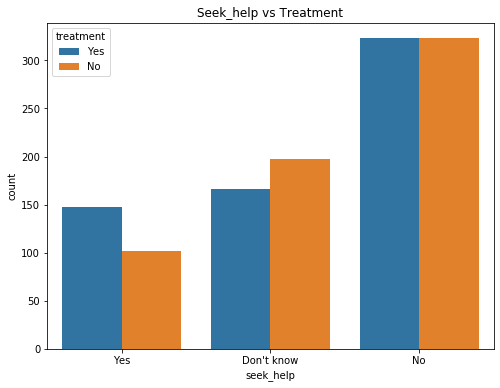

In [128]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'seek_help', hue='treatment')
plt.title('Seek_help vs Treatment')

In [129]:
df['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

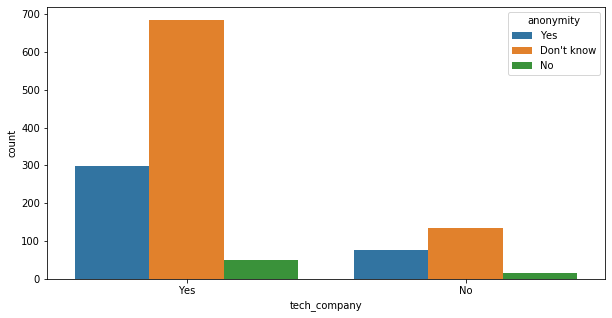

In [130]:
#protection of anonymity by the employers if seeking any help and majority of them don't know about this protection
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'tech_company', hue= 'anonymity')

In [131]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

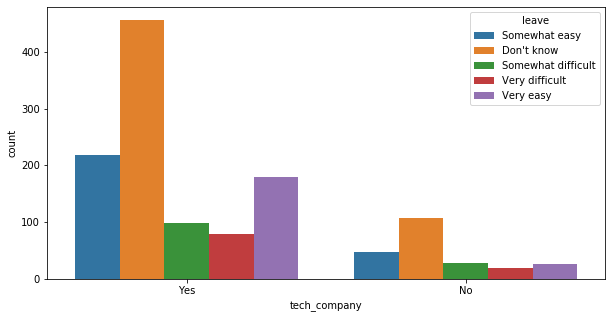

In [132]:
#able to take leave for a mental health issue and majority of respondents who works in tech companies don't know about their leave
plt.figure(figsize=(10,5))
sns.countplot(x= 'tech_company', hue= 'leave', data= df)

In [133]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

Text(0.5, 1.0, 'mental_health_consequence vs supervisor')

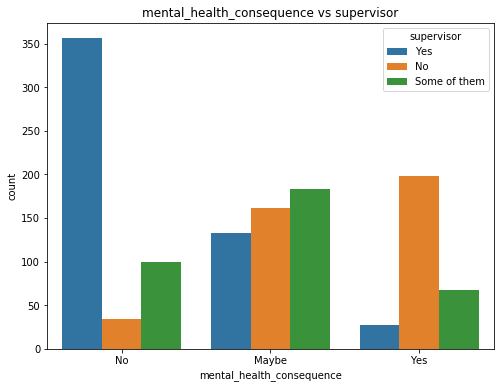

In [134]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'mental_health_consequence', hue='supervisor')
plt.title('mental_health_consequence vs supervisor')

In [135]:
df['phys_health_consequence'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [136]:
df['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

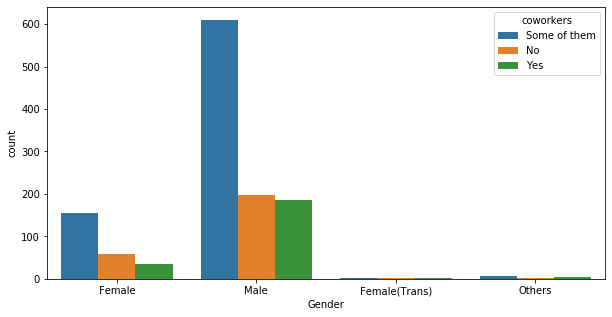

In [137]:
#discussion with coworkers regarding mental health issues
#suggest that both the genders may discuss their issues with their coworkers
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'coworkers', data= df)

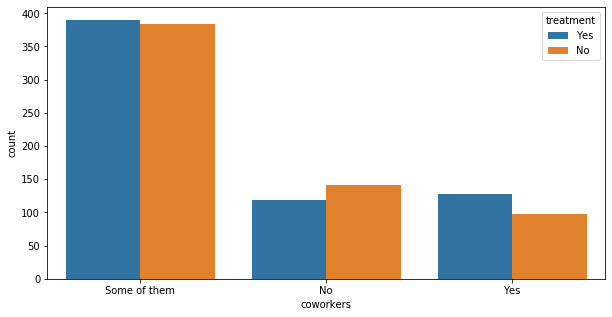

In [158]:
# majority of employees has discussed some of their mental health problem to their coworker
# employees who share their mental health problem to their Coworkers has get treatment
plt.figure(figsize= (10,5))
sns.countplot(x= 'coworkers', hue= 'treatment', data= df)

In [138]:
df['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

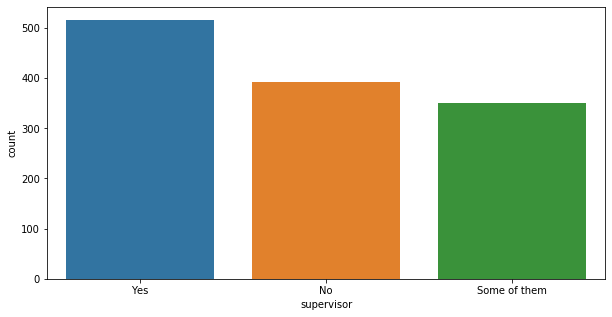

In [42]:
#discussion with supervisor for mental health issues
#males are more likely to discuss their mental health issues with their supervisor as compared to their female counterparts
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'supervisor', data= df)

In [140]:
df['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

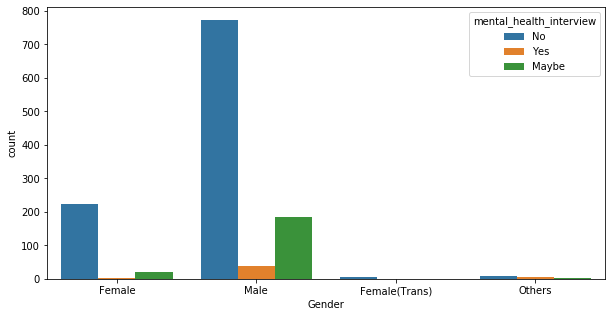

In [141]:
#no one wants to discuss their mental health issues with their prospective employers in an interview
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'mental_health_interview', data= df)

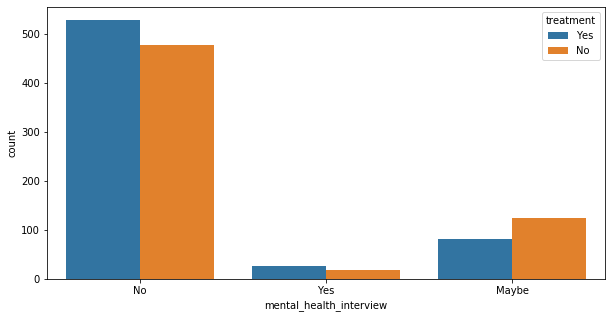

In [142]:
plt.figure(figsize= (10,5))
sns.countplot(x= 'mental_health_interview',hue= 'treatment',  data= df)

In [143]:
df['phys_health_interview'].unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

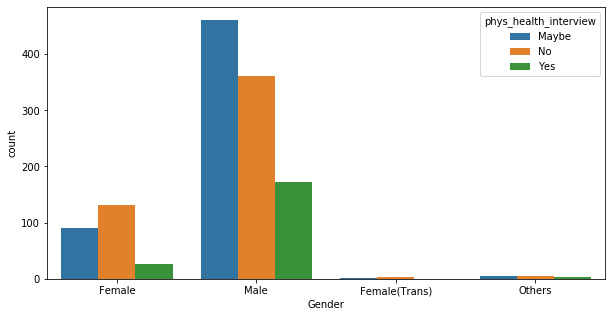

In [144]:
#males maybe more likely to discuss their physical health issues with their prospective employers as compared to females
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'phys_health_interview', data= df)

In [145]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

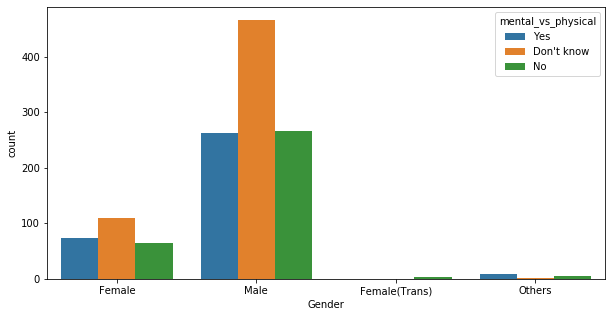

In [146]:
#employees don't know whether their mental health issues are taken as seriously 
#as their physical health issues by their employers
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'mental_vs_physical', data= df)

In [147]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

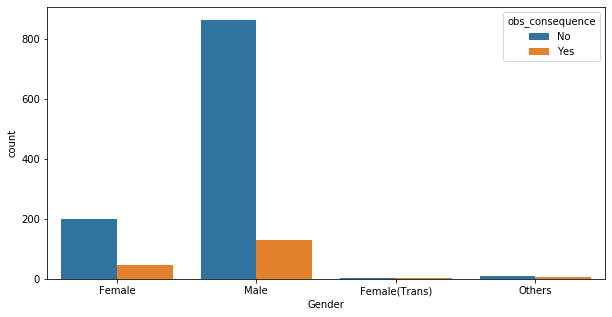

In [148]:
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'obs_consequence', data= df)

### Further Analysis

### Age Group vs Treatment

Text(0.5, 1.0, 'Age Group vs Treatment')

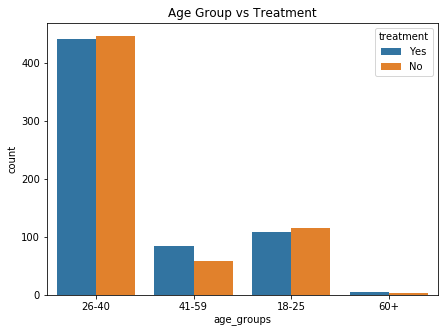

In [149]:
# no big diference between the frequency of which employees have accepted mental health treatment and 
# the frequency of which employees without mental health treatment. 
# The frequencies are almost the same excepting 41-59 age group. 
fig,ax =plt.subplots(figsize=(7,5))
sns.countplot(data = df,x = 'age_groups', hue='treatment')
plt.title('Age Group vs Treatment')


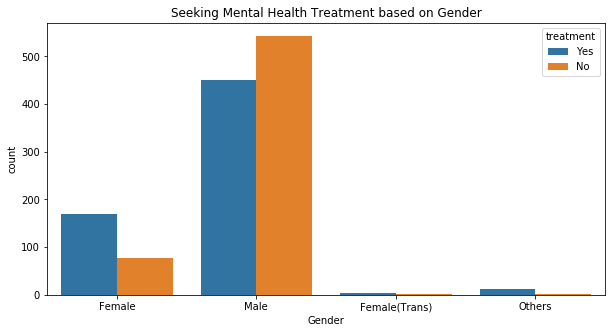

In [150]:
#we can see that females are more ready to go for mental health treatment
#but still this cannot be generalized because of huge difference between the number of males and females
# Although the count of the male is higher than female, 
# the number of male employees with treatment is less than male employees without treatment.
plt.figure(figsize= (10,5))
sns.countplot(x= 'Gender', hue= 'treatment', data= df)
plt.title('Seeking Mental Health Treatment based on Gender')
plt.show()

#### Family History vs Treatment

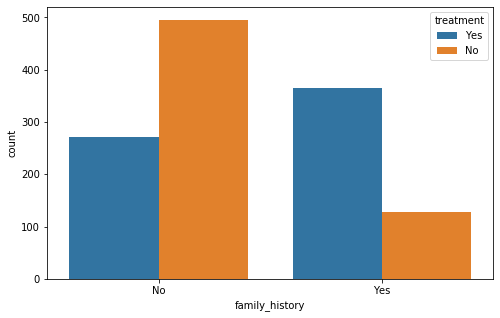

In [151]:
# a lot of people who has family history of mental illness seeks mental health treatment. 
# employees with family history of mental illness are significantly higher than those without a family history mental illness
#people with family history of mental illness pay more attention to mental health problems because if family members have experienced the negative pressure brought by mental health, 
# their other family members are more aware of mental health. 
plt.figure(figsize=(8,5))
sns.countplot(x="family_history", hue="treatment",  data= df)

### Benefit vs Tech companies

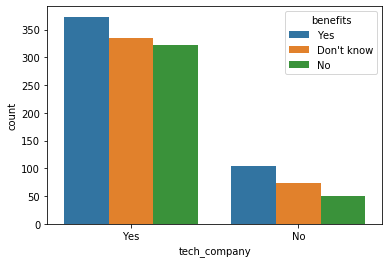

In [152]:
sns.countplot(x= 'tech_company', hue= 'benefits', data= df)
# knowledge of mental health benefits to the employees provided by their employers
#suggest that many people are not aware of any such benefits

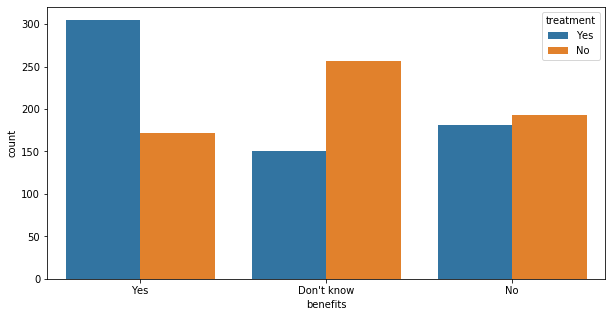

In [217]:
# many employees who has knoweldge of company's benefits has got mental health treatment

plt.figure(figsize=(10,5))
sns.countplot(x="benefits", hue= 'treatment', data=df)

### seek help vs tech company

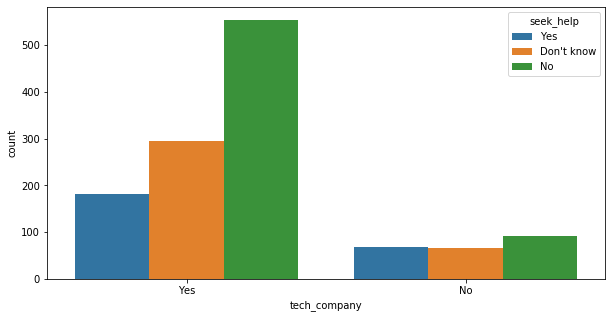

In [154]:
#assistance provided by employers for any help related to mental health issues
#either people are not aware or no resources are provided to learn about mental health issues and seek help by the employers
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'tech_company', hue= 'seek_help' )

From the above analysis(visualization) we can infer that family history plays an important role with a positive relation with family history to seeking treatment.  Knowing what care options your employer provides,  gender; being female is a predictor to seeking treatment. Note that this is not the same as saying that females are more likely to have mental health issues - they are just more likely to seek help for them. Being aware of your employers benefits is also a factor. In addition we can consider wellness program, work interfere, seek help and anonmity as apredictor variables to our model.

#### Remove unnecessary columns

In [298]:
#Now that the values are filled for columns that will be used in the predictive model, 
#we can remove the columns that we do not need.

In [277]:
modeldf = df.drop([ 'Country', 'self_employed','Age','remote_work', 
         'leave', 'mental_health_consequence','supervisor',
       'phys_health_consequence', 'tech_company','coworkers',
        'phys_health_interview','mental_health_interview','seek_help','age_groups',
       'mental_vs_physical', 'obs_consequence'], axis=1)

In [278]:
# columns in the new dataframe
modeldf.columns

Index(['Gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'benefits', 'care_options', 'wellness_program',
       'anonymity'],
      dtype='object')

In [279]:
modeldf.head()

,Gender,family_history,treatment,work_interfere,no_employees,benefits,care_options,wellness_program,anonymity
0,Female,No,Yes,Often,6-25,Yes,Not sure,No,Yes
1,Male,No,No,Rarely,More than 1000,Don't know,No,Don't know,Don't know
2,Male,No,No,Rarely,6-25,No,No,No,Don't know
3,Male,Yes,Yes,Often,26-100,No,Yes,No,No
4,Male,No,No,Never,100-500,Yes,No,Don't know,Don't know


###### Some columns in the data are object types that have string values that cannot be used in the algorithm function. So we need to transform these values in numenric value.


In [280]:
modeldf['Gender'] = modeldf['Gender'].map({'Female':0, 'Male':1,'Female(Trans)':2,'Others':3})

In [281]:
modeldf['treatment'] = modeldf['treatment'].map({'Yes':1, 'No':0})

In [282]:
modeldf['family_history'] = modeldf['family_history'].map({'Yes':1, 'No':0})

In [283]:
modeldf['anonymity'] = modeldf['anonymity'].map({"Yes":1,"Don't know":2,"No":0}) 

In [284]:
modeldf['benefits'] = modeldf['benefits'].map({"Yes":1,"Don't know":2,"No":0})

In [285]:
modeldf['wellness_program']= modeldf['wellness_program'].map({"Yes":1,"Don't know":2,"No":0})

In [286]:
modeldf['work_interfere']= modeldf['work_interfere'].map({'Never':0,'Rarely':1,'Sometimes':2,'Often':3,'cant say':4 })

In [287]:
modeldf['no_employees']= modeldf['no_employees'].map({'1-5':0, '6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5})

In [288]:
modeldf['care_options'] = modeldf['care_options'].map({"Yes":1,"Not sure":2,"No":0})

In [289]:
modeldf.head()

,Gender,family_history,treatment,work_interfere,no_employees,benefits,care_options,wellness_program,anonymity
0,0,0,1,3,1,1,2,0,1
1,1,0,0,1,5,2,0,2,2
2,1,0,0,1,1,0,0,0,2
3,1,1,1,3,2,0,1,0,0
4,1,0,0,0,3,1,0,2,2


The data is "done" being cleaned and prepared, so now we can build, or fit, our logistic regression model. Our next task will be:
  - Separate the attributes (features used to predict) from the target (outcome to predict)
  - Shuffle the order of the rows in the dataset, then separate into a dataset for training (for the model to learn from) and    testing (to see how well it predicts with new data)

#### Separate attributes and target variables

In [290]:
# 'treatment' is target variable
y = modeldf['treatment']

In [291]:
# attributes are all the columns EXCEPT 'treatment'
X = modeldf.drop(['treatment'], axis=1)

In [292]:
# separate 80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the model

In [293]:
# assign logistic regression function to variable
model = LogisticRegression()

In [294]:
# give training data to learn
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [295]:
# overall ratio of correct predictions for training data
model.score(X_train, y_train)

0.8351539225422046

#### Evaluate the model on test data

In [296]:
# overall ratio of correct predictions for test data
model.score(X_test, y_test)

0.7738095238095238

In [297]:
# generate predictions
y_pred = model.predict(X_test)

In [298]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no treatment', 'Predicted: sought treatment'],
    index=['Actual: no treatment', 'Actual: sought treatment']
)

cm

,Predicted: no treatment,Predicted: sought treatment
Actual: no treatment,94,35
Actual: sought treatment,22,101


The confusion matrix shows the counts(94 and 101) of the predictions that we got correct. So of the 129 employees that didn't seek treatment, we predicted 94 of them correctly (and 35 of them incorrectly). 
Of the 123 employees that sought treatment, we predicted 101 correctly (and 22 incorrectly).

In [299]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       129
           1       0.74      0.82      0.78       123

    accuracy                           0.77       252
   macro avg       0.78      0.77      0.77       252
weighted avg       0.78      0.77      0.77       252



Precision is the percent of the model’s positive predictions that are correct. We define it as follows:
Precision(0) = # of positive predicted correctly/# of positive predictions = 94/(94+22)=0.81
Precision(1) = # of positive predicted correctly/ # of positive predictions = 101/(101+136)= 0.74
Recall(0)  = # of positive predicted correctly/# of positive cases= 94/(129)= 0.73
Recall(1)  = # of positive predicted correctly/# of positive cases = 101/(123)= 0.78
             
The F1 score is an average of precision and recall so that we have a single score for our model
Accuracy is the number of datapoints predicted correctly divided by the total number of datapoints.i.e (94+101)/(252)=0.77=77%
 

### Decision Tree Classifier

In [300]:
# assign decision tree function to variable
model = DecisionTreeClassifier()

In [301]:
# give training data to learn
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [302]:
# overall ratio of correct predictions for training data
model.score(X_train, y_train)

0.9314796425024826

#### Evaluate the model on test data

In [303]:
# overall ratio of correct predictions for test data
model.score(X_test, y_test)

0.6944444444444444

In [304]:
# generate predictions
y_pred = model.predict(X_test)

In [305]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no treatment', 'Predicted: sought treatment'],
    index=['Actual: no treatment', 'Actual: sought treatment']
)

cm

,Predicted: no treatment,Predicted: sought treatment
Actual: no treatment,90,39
Actual: sought treatment,38,85


In [306]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       129
           1       0.69      0.69      0.69       123

    accuracy                           0.69       252
   macro avg       0.69      0.69      0.69       252
weighted avg       0.69      0.69      0.69       252



Comparing the two models from the very begining decision tree is not consistent and for this dataset the logistic regression model is better fit.